In [1]:
!pip install numpy
!pip install matplotlib

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

random.seed(int('0xC0FFEE', 16))
np.random.seed(int('0xC0FFEE', 16))
PI = math.pi

## Numpy data load




In [3]:
### np.savez('./filename.npz', x=X, y=Y)

practice1_data = np.load('./practice1_data.npz')
print(f'Check key values: {practice1_data.files}')
X, Y = practice1_data['x'], practice1_data['y']
print(X.shape, Y.shape)
print(X[0:10], Y[0:10])

Check key values: ['x', 'y']
(1000,) (1000,)
[160.86429835 174.97366162 173.9137621  163.800405   190.03698413
 166.23929116 186.3450603  177.38916332 166.12647418 169.35983898] [1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


# Practice 1
평균, 시그마가 정해진 두 개의 클래스에서 1차원 데이터를 샘플링해서, 히스토그램과 확률분포 함수를 각각 그려보시오.

In [4]:
def show_histogram(A, B):
    plt.hist(A, label='a', alpha=0.5)
    plt.hist(B, label='b', alpha=0.5)
    plt.legend(loc='upper left')
    plt.show()

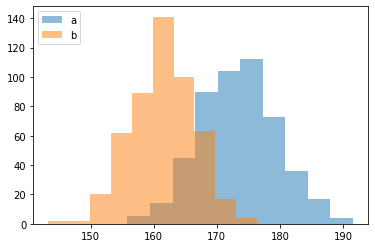

In [5]:
show_histogram(X[Y==0], X[Y==1])

In [6]:
def pdf(x, mean, std):
    return (1 / (std * np.sqrt(PI * 2))) * np.exp(-(1 / 2) * ((x - mean) / std) * ((x - mean) / std))

In [7]:
def show_pdf(x, Y_A, Y_B):
    plt.plot(x, Y_A, color='red', label='A')
    plt.plot(x, Y_B, color='blue', label='B')

    plt.legend(loc='upper left')
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
    plt.show()

In [8]:
x = np.linspace(140, 200, 1000)
Y_A = pdf(x, np.mean(X[Y==0]), np.std(X[Y==0]))
Y_B = pdf(x, np.mean(X[Y==1]), np.std(X[Y==1]))

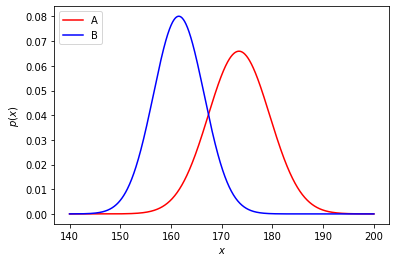

In [9]:
show_pdf(x, Y_A, Y_B)

# Practice 2

추가적으로 테스트 데이터를 샘플링해서, likelihood값만을 이용하는 경우, prior값과 결합하여 posterior로 볼 경우 각각에 대하여 분류 정확도를 보고하고 

(a) likelihood 함수를 그리고, 

(b) prior 적용 시, likelihood x prior 함수를 그리고,

(c) posterior =  likelihood x prior / p(x) 를 그리시오. 

prior의 변화에 따라 decision point를 그래프에서 대략적으로 읽고, prior에 따라서 분류 결과가 어떻게 변화하는지 설명하시오.

In [10]:
practice2_train = np.load('./practice2_train.npz')
print(f'Check key values: {practice2_train.files}')
X_train, Y_train = practice2_train['x'], practice2_train['y']
print(X_train.shape)

Check key values: ['x', 'y']
(1000,)


In [11]:
practice2_test = np.load('./practice2_test.npz')
print(f'Check key values: {practice2_test.files}')
X_test, Y_test = practice2_test['x'], practice2_test['y']
print(X_test.shape)

Check key values: ['x', 'y']
(100,)


In [12]:
def get_likelihood(x, A_mean, A_std, B_mean, B_std):
    return pdf(x, A_mean, A_std), pdf(x, B_mean, B_std)

In [13]:
def get_prior(A, B):
    prior_A = len(A)/ (len(A) + len(B))
    return (prior_A), (1 - prior_A)

In [14]:
def get_posterior(x, A_likelihood, B_likelihood, A_prior, B_prior):
    evidence = (A_likelihood * A_prior) + (B_likelihood * B_prior)
                 
    return A_likelihood * A_prior / evidence, B_likelihood * B_prior / evidence

In [15]:
def get_accuracy(Y_test, A_prob, B_prob):
    y_pred = np.where(A_prob > B_prob, 0, 1)

    return len(np.where(y_pred == Y_test)[0]) / len(y_pred)

Acc: 0.86


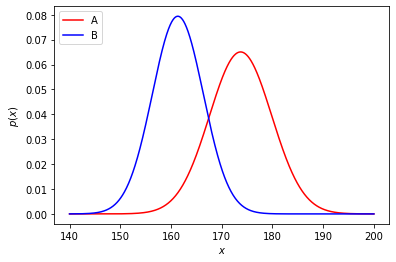

In [16]:
A_likelihood, B_likelihood = get_likelihood(X_test, 
                                np.mean(X_train[Y_train==0]),
                                np.std(X_train[Y_train==0]),
                                np.mean(X_train[Y_train==1]),
                                np.std(X_train[Y_train==1]))
y_pred = np.where(A_likelihood > B_likelihood, 0, 1)

print(f'Acc: {get_accuracy(Y_test, A_likelihood, B_likelihood)}')

graph_x = np.linspace(140, 200, 1000)
A_graph_x, B_graph_x = get_likelihood(graph_x, 
                                np.mean(X_train[Y_train==0]),
                                np.std(X_train[Y_train==0]),
                                np.mean(X_train[Y_train==1]),
                                np.std(X_train[Y_train==1]))

show_pdf(graph_x, A_graph_x, B_graph_x)

0.25 0.75
Acc: 0.83


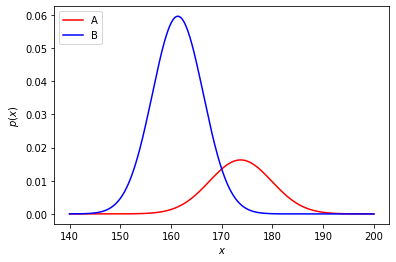

In [17]:
A_prior, B_prior = get_prior(X_train[Y_train==0], X_train[Y_train==1])

print(A_prior, B_prior)

print(f'Acc: {get_accuracy(Y_test, A_likelihood * A_prior, B_likelihood * B_prior)}')

show_pdf(graph_x, A_graph_x * A_prior, B_graph_x * B_prior)

Acc: 0.83


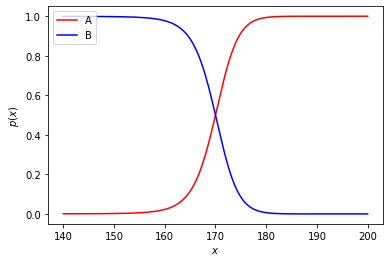

In [18]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, A_prior, B_prior)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

A_graph_prob, B_graph_prob = get_posterior(X_test, A_graph_x, B_graph_x, A_prior, B_prior)


show_pdf(graph_x, A_graph_prob, B_graph_prob)

- prior_A: 0.5
- prior_B: 0.5

In [19]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.5, 0.5)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.86


- prior_A: 0.4
- prior_B: 0.6

In [20]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.4, 0.6)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.86


- prior_A: 0.25
- prior_B: 0.75

In [21]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.25, 0.75)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.83


# Practice 3
두 클래스의 평균 사이의 거리를 점차 증가시키면서 train, test 데이터를 샘플링하여 Bayesian 분류기의 정확도를 계산해보시오.

s = 3
mu = (-1, 1), (-2, 2), (-3, 3)
train / test sampling - report performance

In [2]:
def get_data(num_data, ratio, A_mean, A_std, B_mean, B_std):

    num_data_A = int(num_data * ratio)
    num_data_B = num_data - num_data_A

    A = np.random.normal(loc=A_mean, scale=A_std, size=num_data_A)
    B = np.random.normal(loc=B_mean, scale=B_std, size=num_data_B)

    label_zeros = np.zeros((num_data_A, 1))
    label_ones = np.ones((num_data_B, 1))
    
    return A, B, label_zeros, label_ones

In [23]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 1, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -1, 3, 1, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.62


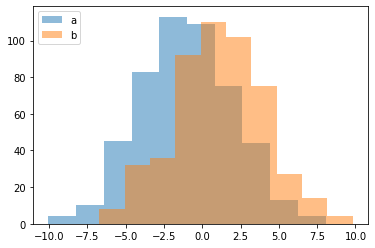

In [24]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

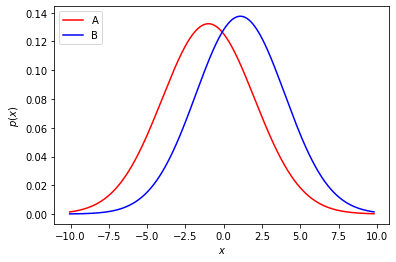

In [25]:
# train_A, train_B의 가장 작은 x값 부터 가장 큰 x값 범위까지 1000개의 데이터 샘플링
x = np.linspace(min(np.concatenate((train_A, train_B))), max(np.concatenate((train_A, train_B))), 1000)
Y_A = pdf(x, np.mean(train_A), np.std(train_A)) # train_A의 probability density function 계산 (이하 동일)
Y_B = pdf(x, np.mean(train_B), np.std(train_B)) # train_B의 probability density function 계산 (이하 동일)

show_pdf(x, Y_A, Y_B)

In [26]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -2, 3, 2, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -2, 3, 2, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.72


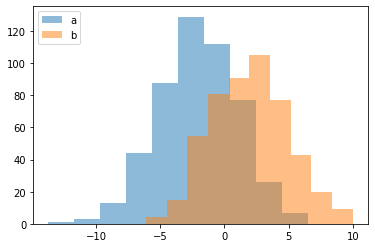

In [27]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

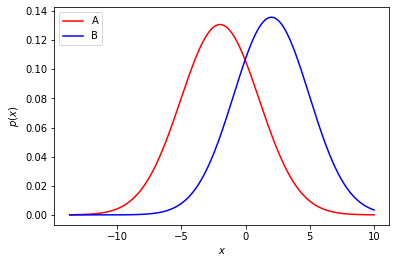

In [28]:
x = np.linspace(min(np.concatenate((train_A, train_B))), max(np.concatenate((train_A, train_B))), 1000)
Y_A = pdf(x, np.mean(train_A), np.std(train_A))
Y_B = pdf(x, np.mean(train_B), np.std(train_B))

show_pdf(x, Y_A, Y_B)

In [29]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -3, 3, 3, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -3, 3, 3, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.87


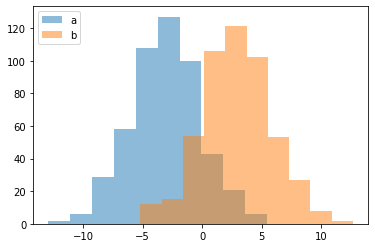

In [30]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

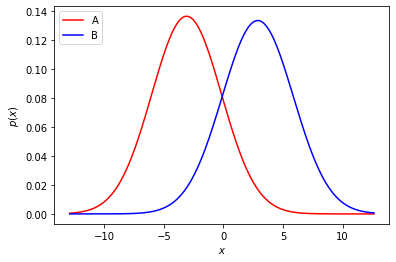

In [31]:
x = np.linspace(min(np.concatenate((train_A, train_B))), max(np.concatenate((train_A, train_B))), 1000)
Y_A = pdf(x, np.mean(train_A), np.std(train_A))
Y_B = pdf(x, np.mean(train_B), np.std(train_B))

show_pdf(x, Y_A, Y_B)

# Practice 4

Practice 3에서 그린 세 개의 히스토그램을 probability density function으로 그리시오.



# Practice 5

두 클래스의 데이터가 다음과 같은 Gaussian 분포를 따른다고 할 때, 아래 설명에 따라 Bayesian 분류기의 분류 정확도를 계산하시오. 

A class : mu = -1, s = 3
B class : mu = 3, s = 2

a) P(A)=P(B)일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

b) P(A)=1/3, P(B)=2/3일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

c) a)와 b)에서 구한 p(A|x)=p(B|x)을 풀면 decision point를 구할 수 있다. 각 decision point를 구하여 a)와 b)에서 그린 그래프 위에 표시하시오. 

d) Decision point를 구한 후에 Bayesian 분류기의 분류 방법이 어떻게 간단히 변화할 수 있는지 설명하시오.

e) test set을 A, B 클래스에 대하여 각 100개씩 샘플링하여, d)에서 설명한 방법으로 분류 정확도를 구하시오. 단, P(A)=P(B)



In [32]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 3, 2)
# data x 값 범위를 알아내어 그 범위만큼 x 값 생성
x = np.linspace(min(np.concatenate((train_A, train_B))), max(np.concatenate((train_A, train_B))), 1000)

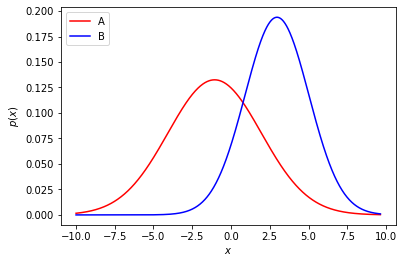

In [33]:
# x의 train_A, train_B에 대한 likelihood 계산
A_likelihood, B_likelihood = get_likelihood(x,
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
# train_A, train_B의 prior probability
A_prior, B_prior = get_prior(train_A, train_B)
# a) p(x|A), p(x|B) 출력
show_pdf(x, A_likelihood, B_likelihood)

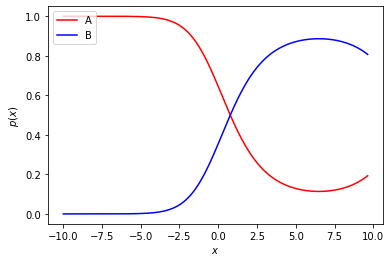

In [34]:
# A, B의 posterior probability = 각각 likelihood * prior / evidence
A_prob, B_prob = get_posterior(x, A_likelihood, B_likelihood, A_prior, B_prior)
# a) P(A|x), P(B|x) 출력
show_pdf(x, A_prob, B_prob)

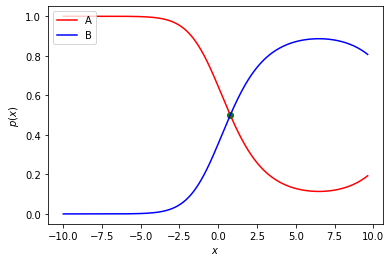

In [35]:
# data A, B의 posterior probabilty의 차가 가장 적은 값
diff=abs(A_prob-B_prob)
# 가장 적은 값을 갖는 argument 찾기
dp=np.argmin(diff)
# c) decision point 값 표시
plt.plot(x[dp], A_prob[dp], color='green', marker="o")

# pdf 출력
plt.plot(x, A_prob, color='red', label='A')
plt.plot(x, B_prob, color='blue', label='B')

plt.legend(loc='upper left')
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [36]:
# Train data
train_A, train_B, _, _ = get_data(1000, (1/3), -1, 3, 3, 2) # prior 변경
x = np.linspace(min(np.concatenate((train_A, train_B))), max(np.concatenate((train_A, train_B))), 1000)

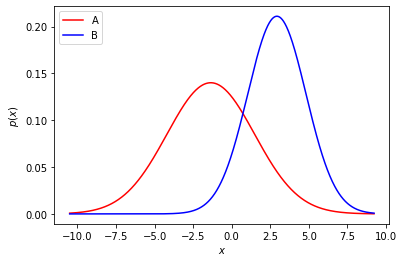

In [37]:
A_likelihood, B_likelihood = get_likelihood(x, # 이하 동일
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
# b) p(x|A), p(x|B) 출력
show_pdf(x, A_likelihood, B_likelihood)

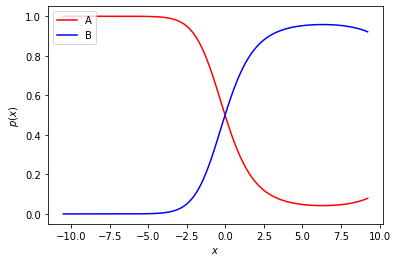

In [38]:
A_prob, B_prob = get_posterior(x, A_likelihood, B_likelihood, A_prior, B_prior)
# b) P(A|x), P(B|x) 출력
show_pdf(x, A_prob, B_prob)

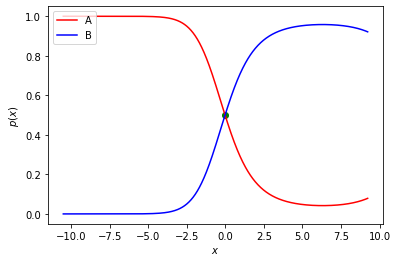

In [39]:
diff=abs(A_prob-B_prob)
dp=np.argmin(diff)
# c) decision point 값 표시
plt.plot(x[dp], A_prob[dp], color='green', marker="o")

plt.plot(x, A_prob, color='red', label='A')
plt.plot(x, B_prob, color='blue', label='B')

plt.legend(loc='upper left')
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [40]:
# d) Decision point를 구한 후에 Bayesian 분류기의 분류 방법이
# 어떻게 간단히 변화할 수 있는지 설명하시오.

# 임의의 x 값이 입력되었을 때 decision point의 x 값과 그 크기를 비교하여,
# 어떤 클래스로 분류하여야 오류를 줄일 수 있는지 간단히 판단할 수 있다.
# 위의 그래프의 경우 decision point의 x 값보다 작은 임의의 x 값이 입력 될 경우,
# A 클래스로 분류하여야 그 클래스가 아닐 위험을 줄일 수 있다.

In [41]:
# e) test set을 A, B 클래스에 대하여 각 100개씩 샘플링하여
# d)에서 설명한 방법으로 분류 정확도를 구하시오. 단, P(A)=P(B)

# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 3, 2) # P(A)=P(B) 설정
x = np.linspace(min(np.concatenate((train_A, train_B))), max(np.concatenate((train_A, train_B))), 1000)

# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -1, 3, 3, 2) # 100개의 data 샘플링
test_X = np.concatenate((test_A, test_B)) 
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

# A, B 클래스에 대한 likelihood
A_likelihood, B_likelihood = get_likelihood(test_X,
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
# A, B 클래스에 대한 posterior probability
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)

# decision point 값 지정
diff=abs(A_prob-B_prob)
dp=np.argmin(diff)

# decision point에서의 A_prob와 B_prob의 중간지점을 기준으로 입력 데이터의 클래스 분류
y_pred = np.where(test_X < ((A_prob[dp] + B_prob[dp]) / 2), 0, 1)
# 클래스 분류가 맞게 된 경우를 전체 데이터 크기로 나누기
accu=len(np.where(y_pred == test_Y)[0]) / len(y_pred)
# accuracy 출력
print(f'Acc: {accu}')

Acc: 0.84
